In [651]:
import numpy as np
from numpy import zeros, eye, array, exp, linspace, vstack
from numpy.random import randn, default_rng, randint
from numpy.linalg import norm, solve, svd, inv, det, matrix_rank

from scipy.stats import multivariate_normal as MVN
from scipy.optimize import fsolve, root
from scipy.linalg import qr

import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns

from Manifolds.GeneralizedEllipse import GeneralizedEllipse
from utils import prep_contour, line_perp_v_through_point, line_between

import plotly
import plotly.express as px
import plotly.graph_objects as go

In [270]:
μ = zeros(2)
Σ = array([[5.0, 0.0], [0.0, 1.0]])
π = MVN(μ, Σ)
f = π.logpdf
grad_f = lambda x: - solve(Σ, x - μ)
z0 = -8.0

In [271]:
ellipse = GeneralizedEllipse(μ, Σ, exp(z0))

In [275]:
manifold = prep_contour([-8, 8], [-8, 8], 0.01, f)

In [276]:
find_point_closest_to = lambda point:  fsolve(lambda x: array([f(x) - z0, 0]), point)

In [278]:
def sample_along_tangent(x, σ=1.0, seed=1234, v=1.0):
    Qx = ellipse.Q(x)
    tx_basis = ellipse.tangent_basis(Qx)
    rng = default_rng(seed)
    #v_sample = array([v]) #σ*rng.normal(size=ellipse.get_dimension())
    v_sample = abs(σ * rng.normal(size=ellipse.get_dimension()))
    return tx_basis @ v_sample 

In [279]:
# Points and Velocities for Zappa RWM
init_point = array([-1, 1.6])#array([-1.25, 0.75])
x0 = find_point_closest_to(init_point)
v0 = sample_along_tangent(x0, v=1.5, σ=5.0)
λ  = project(x0, v0, ellipse.Q(x0), ellipse.q)[0]
x1 = (x0 + v0) + ellipse.Q(x0) @ λ

# Point for HUG
x_mid = x0 + v0
g_mid = grad_f(x_mid) / norm(grad_f(x_mid))
v1 = v0 - 2*g_mid * (g_mid @ v0)
x1_hug = x_mid + v1

# Point for HUG but using the initial Jacobian
x_mid = x0 + v0
g0 = grad_f(x0) / norm(grad_f(x0))
v1_new = v0 - 2*g0 * (g0 @ v0)
x1_hug_new = x_mid + v1_new

I want to plot

- Sphere
- Point on sphere $x_0$
- Tangent plane at $x_0$
- A velocity $v$ on the tangent plane
- Another vector on the tangent plane representing $\ddot{x}_t^{\text{tan}}$
- A normal vector representing the Jacobian\gradient.
- Possibly another normal vector representing $\ddot{x}_t^{\text{row}}$.

In [551]:
def ms(x, y, z, radius, resolution=20):
    """Return the coordinates for plotting a sphere centered at (x,y,z)"""
    u, v = np.mgrid[0:2*np.pi:resolution*2j, 0:np.pi:resolution*1j]
    X = radius * np.cos(u)*np.sin(v) + x
    Y = radius * np.sin(u)*np.sin(v) + y
    Z = radius * np.cos(v) + z
    return (X, Y, Z)

In [566]:
import pandas as pd

In [578]:
df = pd.DataFrame({
    'x': [point_new[0]], 
    'y': [point_new[1]],
    'z': [point_new[2]],
    'color': ['black'],
    'size': [100]})

In [579]:
X, Y, Z = ms(0, 0, 0, 1)
data = [go.Surface(x=X, y=Y, z=Z, opacity=0.5)]

In [582]:
trace = go.Scatter3d(
   x = [0], y = [0], z = [-1],mode = 'markers', marker = dict(
      size = 12,
      colorscale = 'Viridis'
      )
   )

In [584]:
fig = go.Figure(data=[data, trace])
# px.scatter_3d(df, x='x', y='y', z='z', color='color', size='size')
# fig = go.Figure()
fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [[Surface({
    'opacity': 0.5,
    'x': array([[0.00000000e+00, 1.64594590e-01, 3.24699469e-01, ..., 3.24699469e-01,
                 1.64594590e-01, 1.22464680e-16],
                [0.00000000e+00, 1.62463134e-01, 3.20494696e-01, ..., 3.20494696e-01,
                 1.62463134e-01, 1.20878794e-16],
                [0.00000000e+00, 1.56123967e-01, 3.07989279e-01, ..., 3.07989279e-01,
                 1.56123967e-01, 1.16162212e-16],
                ...,
                [0.00000000e+00, 1.56123967e-01, 3.07989279e-01, ..., 3.07989279e-01,
                 1.56123967e-01, 1.16162212e-16],
                [0.00000000e+00, 1.62463134e-01, 3.20494696e-01, ..., 3.20494696e-01,
                 1.62463134e-01, 1.20878794e-16],
                [0.00000000e+00, 1.64594590e-01, 3.24699469e-01, ..., 3.24699469e-01,
                 1.64594590e-01, 1.22464680e-16]]),
    'y': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 0.00000000e+00,  2.64028290e-02,  5.20854577e-02, ...,
                  5.20854577e-02,  2.64028290e-02,  1.96447162e-17],
                [ 0.00000000e+00,  5.21218387e-02,  1.02821930e-01, ...,
                  1.02821930e-01,  5.21218387e-02,  3.87806445e-17],
                ...,
                [ 0.00000000e+00, -5.21218387e-02, -1.02821930e-01, ...,
                 -1.02821930e-01, -5.21218387e-02, -3.87806445e-17],
                [ 0.00000000e+00, -2.64028290e-02, -5.20854577e-02, ...,
                 -5.20854577e-02, -2.64028290e-02, -1.96447162e-17],
                [ 0.00000000e+00, -4.03140476e-17, -7.95284331e-17, ...,
                 -7.95284331e-17, -4.03140476e-17, -2.99951957e-32]]),
    'z': array([[ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ],
                [ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ],
                [ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ],
                ...,
                [ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ],
                [ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ],
                [ 1.        ,  0.9863613 ,  0.94581724, ..., -0.94581724, -0.9863613 ,
                 -1.        ]])
})]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [589]:
point_mathcha = np.array([0.06411414,0.7059826,0.705255])

In [590]:
point_mathcha*2

array([0.12822828, 1.4119652 , 1.41051   ])

In [588]:
np.pi

3.141592653589793

In [587]:
2*np.pi

6.283185307179586

In [340]:
def generate_grid_on_sphere(N):
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

In [396]:
angle = 225
point = np.array([np.cos(np.radians(angle)), 0, np.sin(np.radians(angle))])

In [471]:
seed = randint(low=1000, high=9999)
print("Seed: ", seed)
rng = default_rng(seed)
point = rng.normal(size=3)
point = point / norm(point)

Seed:  8648


In [506]:
# Sample a velocity vector on the tangent space.
σ_velocity = 0.5
v_sample = rng.normal(size=2)
velocity = svd(point.reshape(-1, 1))[0][:, 1:] @ (σ_velocity * v_sample)

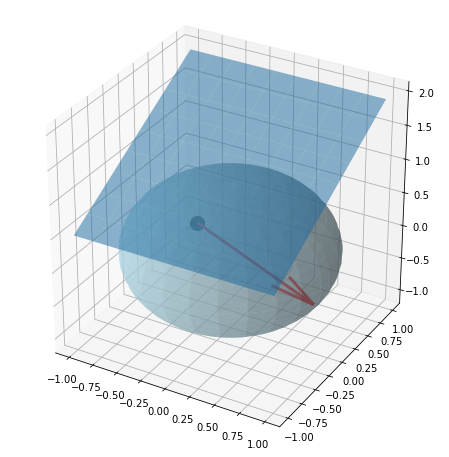

In [514]:
# Parameters
N       = 50
STRIDE  = 2
ELEVATION = 30
AZIM = None
αSPHERE = 0.5
SPHERE_COLOR = 'lightblue'

# Plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8, 8))
ax.plot_surface(*generate_grid_on_sphere(N), linewidth=0.0, cstride=STRIDE, rstride=STRIDE, alpha=αSPHERE, color=SPHERE_COLOR, zorder=-10)
ax.scatter(*point, s=200, color='k', zorder=100)
ax.plot_surface(*line3d_values2(point, point, -1, 1, -1, 1), alpha=0.5, zorder=-10)
ax.quiver(*point, *(velocity-point), color='red', zorder=100, lw=3)
ax.view_init(elev=ELEVATION, azim=AZIM)
ax.set_box_aspect((1,1,1))
plt.show()

In [475]:
def line3d_values(x0, xvalues, yvalues):
    """Computes z values for a 3D line passing through x0 and with normal vector x0."""
    d  = - np.sum(x0**2) / x0[-1]
    mx = - x0[0] / x0[-1]
    my = - x0[1] / x0[-1]
    return mx*xvalues + my*yvalues + d

In [592]:
def compute_d_mx_my(x0):
    d  = - np.sum(x0**2) / x0[-1]
    mx = - x0[0] / x0[-1]
    my = - x0[1] / x0[-1]
    return d, mx, my

In [593]:
compute_d_mx_my(point_mathcha)

(-1.417794513297601, -0.09090916051640896, -1.0010316835754445)

In [612]:
v_sample = rng.normal(size=2)

In [613]:
v = svd(point_mathcha.reshape(-1, 1))[0][:, 1:] @ v_sample

In [620]:
a_sample = randn(2)
a = svd(point_mathcha.reshape(-1, 1))[0][:, 1:] @ a_sample

In [621]:
a + point_mathcha

array([0.70047422, 0.36321389, 0.99052638])

In [615]:
v

array([ 0.28033247, -1.20499169,  1.18075007])

In [614]:
point_mathcha @ v

-2.464159479856382e-16

In [616]:
point_mathcha + v

array([ 0.34444661, -0.49900909,  1.88600507])

In [605]:
point_mathcha + np.array([0.04042324, 0.44511403, 0.44465529])

array([0.10453738, 1.15109663, 1.14991029])

In [596]:
point_mathcha @ point_mathcha / point_mathcha[2]

1.417794513297601

In [ ]:
def compute_d_mx_my_new(point):
    d = - point @ point
    

In [480]:
def line3d_values2(point, normal, xmin, xmax, ymin, ymax, steps=10):
    d = - point @ normal
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, steps), np.linspace(ymin, ymax, steps))
    return xx, yy, (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

In [519]:
point_new = np.array([0.0, -1, 0.0])

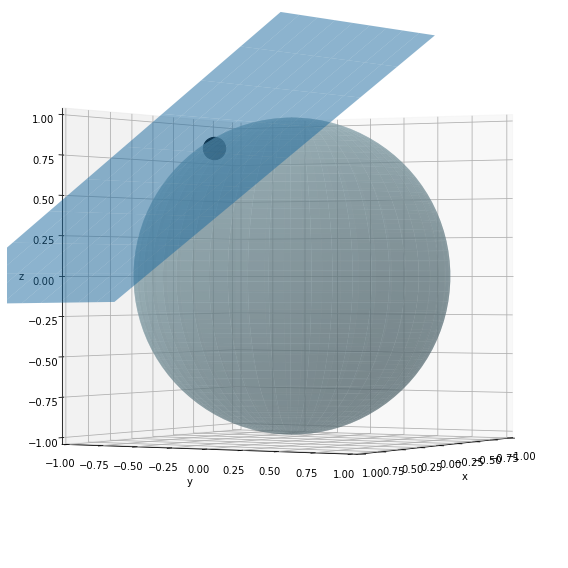

In [549]:
def sphere_grid(N):
    """Generates x, y, z values for a grid on a sphere of radius 1."""
    u, v = np.linspace(0, 2 * np.pi, N), np.linspace(0, np.pi, N)
    x, y = np.outer(np.cos(u), np.sin(v)), np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

# This point should be in front of the sphere (of radius 1)
point = np.array([0, -0.7, 1])
point = point / norm(point)


STRIDE = 1

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8, 8))
# Plot sphere
ax.plot_surface(*sphere_grid(N), linewidth=0.0, cstride=STRIDE, rstride=STRIDE, alpha=0.5, color='lightblue', zorder=1)
# Plot plane
ax.plot_surface(*line3d_values2(point, point, -1, 1, -2, 0.5), alpha=0.5, zorder=1)
# Plot point
ax.scatter(*point, s=500, color='k', zorder=10)
# Adjust view
ax.view_init(elev=0, azim=30)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect((1,1,1))
plt.tight_layout()
plt.show()

In [550]:
# Plot with plotly

In [680]:
def check_if_reflection_has_determinant_minus_one(m, n):
    assert m < n, "m must be less than n."
    I = eye(n)                # Identity Matrix
    A = randn(m, n)           # Original Matrix
    assert matrix_rank(A) == m, "Rank of A must be {}, but it is {}".format(m, matrix_rank(A))
    P = A.T @ inv(A@A.T) @ A  # Projection Matrix
    R = I - 2*P               # Reflection Matrix
    return det(R)

In [683]:
check_if_reflection_has_determinant_minus_one(5, 6)

-0.999999999999999